https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgdocsvm_vs_ocsvm.html#sphx-glr-auto-examples-linear-model-plot-sgdocsvm-vs-ocsvm-py

In [ ]:
%matplotlib inline


# One-Class SVM versus One-Class SVM using Stochastic Gradient Descent

This example shows how to approximate the solution of
:class:`sklearn.svm.OneClassSVM` in the case of an RBF kernel with
:class:`sklearn.linear_model.SGDOneClassSVM`, a Stochastic Gradient Descent
(SGD) version of the One-Class SVM. A kernel approximation is first used in
order to apply :class:`sklearn.linear_model.SGDOneClassSVM` which implements a
linear One-Class SVM using SGD.

Note that :class:`sklearn.linear_model.SGDOneClassSVM` scales linearly with
the number of samples whereas the complexity of a kernelized
:class:`sklearn.svm.OneClassSVM` is at best quadratic with respect to the
number of samples. It is not the purpose of this example to illustrate the
benefits of such an approximation in terms of computation time but rather to
show that we obtain similar results on a toy dataset.


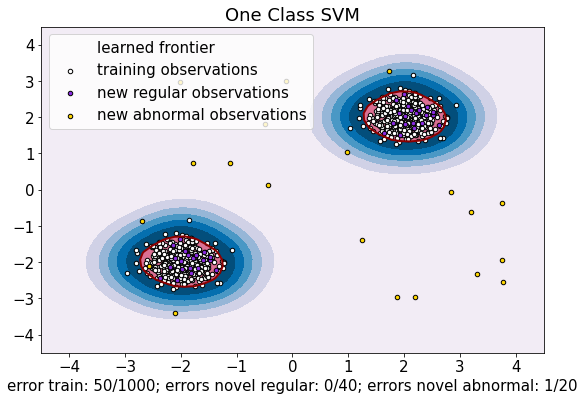

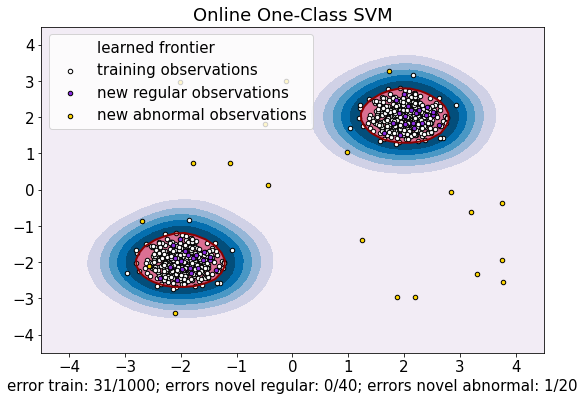

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

font = {"weight": "normal", "size": 15}

matplotlib.rc("font", **font)

random_state = 42
rng = np.random.RandomState(random_state)

# Generate train data
X = 0.3 * rng.randn(500, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))

# OCSVM hyperparameters
nu = 0.05
gamma = 2.0

# Fit the One-Class SVM
clf = OneClassSVM(gamma=gamma, kernel="rbf", nu=nu)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Fit the One-Class SVM using a kernel approximation and SGD
transform = Nystroem(gamma=gamma, random_state=random_state)
clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(X_train)
y_pred_train_sgd = pipe_sgd.predict(X_train)
y_pred_test_sgd = pipe_sgd.predict(X_test)
y_pred_outliers_sgd = pipe_sgd.predict(X_outliers)
n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

Z_sgd = pipe_sgd.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_sgd = Z_sgd.reshape(xx.shape)

# plot the level sets of the decision function
plt.figure(figsize=(9, 6))
plt.title("One Class SVM")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-4.5, 4.5))
plt.ylim((-4.5, 4.5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.xlabel(
    "error train: %d/%d; errors novel regular: %d/%d; errors novel abnormal: %d/%d"
    % (
        n_error_train,
        X_train.shape[0],
        n_error_test,
        X_test.shape[0],
        n_error_outliers,
        X_outliers.shape[0],
    )
)
plt.show()

plt.figure(figsize=(9, 6))
plt.title("Online One-Class SVM")
plt.contourf(xx, yy, Z_sgd, levels=np.linspace(Z_sgd.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z_sgd, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z_sgd, levels=[0, Z_sgd.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-4.5, 4.5))
plt.ylim((-4.5, 4.5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.xlabel(
    "error train: %d/%d; errors novel regular: %d/%d; errors novel abnormal: %d/%d"
    % (
        n_error_train_sgd,
        X_train.shape[0],
        n_error_test_sgd,
        X_test.shape[0],
        n_error_outliers_sgd,
        X_outliers.shape[0],
    )
)
plt.show()